Nama : Abd Salam At Taqwa

#Laporan Proyek Machine Learning - Abd Salam At Taqwa

##Domain Proyek

###Latar Belakang

Kebiasaan makan dalam kehidupan seseorang harus lebih diperhatikan karena pola makan yang tidak sehat dapat menyebabkan berbagai macam penyakit, salah satunya adalah obesitas. Obesitas merupakan suatu kondisi dimana lemak menumpuk atau berlebihan sehingga dapat berdampak buruk bagi kesehatan. Kegagalan untuk segera mengatasi obesitas dapat meningkatkan risiko penyakit jantung, tekanan darah tinggi, dan diabetes. Obesitas menyebabkan berbagai masalah di berbagai bidang (kesehatan, demografi, tenaga kerja, keluarga, dan ekonomi) [(Gozukara et al, 2023)](https://www.mdpi.com/2075-4418/13/18/2949)

Untuk mengatasi masalah penyakit obesitas ini, lembaga dan perusahaan swasta, serta organisasi internasional mendorong untuk pencegahan dan pengobatan yang berfokus pada aktivitas fisik dan kebiasaan gizi [(Navidad et al, 2021)](https://www.mdpi.com/1660-4601/18/19/10187), karena keduanya merupakan dua faktor risiko utama dalam mencegah penyakit obesitas. Pada penelitian [(Palechor et al, 2019)](https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub) telah mengumpulkan dataset berdasarkan kebiasan makan dan kondisi fisik untuk setiap tingkat obesitas berdasarkan standar WHO.
Masing-masing data yang didapatkan dihitung tingkat BMInya, kemudian kriteria WHO diterapkan untuk mengklasifikasikan tingkat obesitas sebagai berikut: berat badan kurang = BMI kurang dari 18,5; normal = BMI antara 18,5 dan 24,9; kelebihan berat badan = BMI antara 25,0 dan 29,9; obesitas I = BMI antara 30,0 dan 34,9; obesitas II = BMI antara 35,0 dan 39,9; dan obesitas III = BMI lebih tinggi dari 40. Kriteria WHO didasarkan pada hubungan antara BMI dan risiko penyakit kronis dan kematian.

Fitur yang digunakan untuk kebiasaan makan pada dataset tersebut adalah Frekuensi konsumsi makanan berkalori tinggi (FAVC), Frekuensi konsumsi sayuran (FCVC), Jumlah makanan utama (NCP), Konsumsi makanan di antara waktu makan (CAEC), Konsumsi air setiap hari (CH20), dan Konsumsi alkohol (CALC). Selain dari pola makan fitur terkait pada kondisi fisik uang juga digunakan pada dataset adalah: Pemantauan konsumsi kalori (SCC), Frekuensi aktivitas fisik (FAF), Waktu penggunaan menggunakan perangkat teknologi (TUE), Transportasi yang digunakan (MTRANS), variabel lain yang diperoleh adalah: Jenis Kelamin, Usia, Tinggi dan Berat Badan.

Pada proyek ini dibangun sebuah model pembelajaran untuk memprediksi tingkat obesitas seseorang berdasarkan kebiasan makan dan kondisi fisik seseorang. Hal ini dapat memudahkan manusia untuk memonitoring tingkat obesitas seseorang sehingga mendapatkan tingkat obesitas yang normal dan membantu untuk mencegah obesitas meningkat.


##Business Understanding


Proyek ini dibangun untuk mengatur kebiasaan makan dan kondisi fisik seseorang untuk mendapatkan tingkat obesitas yang ideal. Data dari kebiasaan makan dan kondisi fisik dapat digunakan untuk memprediksi tingkatan dari obesitas seseorang. Hasil dari prediksi tingkatan obesitas dapat dijadikan sebagai acuan untuk mengatur atau memperbaiki kebiasaa makan dan kondisi fisik sebelum penyakit obesitas bertambah parah.

##Problem Statements

Berdasarkan latar belakang diatas, masalah yang dapat diangkat adalah:
* Bagaimana memprediksi tingkat obesitas seseorang berdasarkan kebiasaan makan dan kondisi fisik seseorang?
* Bagaimana memilih model terbaik untuk memprediksi tingkat obesitas seseorang?

##Goals
* Membangun sebuah model yang dapat memprediksi tingkat obesitas seseorang berdasarkan kebiasaan makan dan kondisi fisik seseorang
* Memilih model terbaik berdasarkan tingkat kesalahan dari MSE yang terkecil

## Solution statements
* Membangun 3 model machine learning sederhana untuk memprediksi tingkat obesitas seseorang
* Memilih model machine learning yang terbaik berdasarkan tingkat kesalahan terkecil dari MSE

##Data Understanding & Removing Outlier

Dataset yang digunakan dalam proyek ini merupakan data kebiasaan makan dan kondisi fisik yang memiliki kriteria tingkat obesitasnya masing-masing. Dataset ini sudah tersedia dan dapat diunduh pada [UCI Machine learning](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

*Menginstall package ucimlrepo*

In [1]:

!pip install ucimlrepo

*Mengimport librari yang ucimlrepo yang telah diinstall sebelumnya*




In [2]:

from ucimlrepo import fetch_ucirepo


*Mengambil data dari repositori UCI Machine Learning menggunakan id dataset*

In [37]:
support2 = fetch_ucirepo(id=544)
# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

# metadata
print(support2.metadata)

{'uci_id': 544, 'name': 'Estimation of obesity levels based on eating habits and physical condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

*Mencetak informasi variabel*

In [4]:
print(support2.variables)

                              name     role         type demographic  \
0                           Gender  Feature  Categorical      Gender   
1                              Age  Feature   Continuous         Age   
2                           Height  Feature   Continuous        None   
3                           Weight  Feature   Continuous        None   
4   family_history_with_overweight  Feature       Binary        None   
5                             FAVC  Feature       Binary        None   
6                             FCVC  Feature      Integer        None   
7                              NCP  Feature   Continuous        None   
8                             CAEC  Feature  Categorical        None   
9                            SMOKE  Feature       Binary        None   
10                            CH2O  Feature   Continuous        None   
11                             SCC  Feature       Binary        None   
12                             FAF  Feature   Continuous        

Berikut informasi pada dataset :

* Dataset memiliki format CSV (Comma-Seperated Values).
* Dataset memiliki 2111 sample dengan 16 fitur.
* Dataset memiliki 4 fitur bertipe categorical 6 fitur bertipe data continuous, 4 bertipe data binary, dan 2 tipe data integer.
* Tidak ada missing value dalam dataset.

##Variable - variable pada dataset
* Gender : Jenis kelamin
* Age : Umur  
* Height : Tinggi badan
* Weight : Berat badan
* family_history_with_overweight : riwayat keluarga dengan kelebihan berat badan
* FAVC : Sering konsumsi makanan berkalori tinggi
* FCVC : Frekuensi konsumsi sayuran
* NCP  : Jumlah makanan utama
* CAEC : Konsumsi makanan di antara waktu makan
* SMOKE : Perokok atau tidak merokok
* CH2O : Konsumsi air setiap hari
* SCC  : Pemantauan konsumsi kalori
* FAF : Frekuensi aktivitas fisik
* TUE  : Waktu menggunakan perangkat teknologi
* CALC : Konsumsi alkohol
* MTRANS : Transportasi yang digunakan
* NObeyesdad  : Label tingkat obesitas

## Exploratory Data Analysis
### Assessing Data

*Mengimport librari yang dibutuhkan*

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

*Melihat informasi dataset*

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

*Melihat jumlah nilai null pada masing-masing kolom*

In [7]:

X.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

*Melihat deskripsi data untuk menganalisis penyebaran data masing-masing fitur dengan tipe data integeruntuk melihat apakah ada anomali data. Berdasarkan hasil didapatkan bahwa tidak terdapat data anomali atau data tidak jelas pada dataset.*

In [8]:
X.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Univariate Analysis

*Visualisasi distribusi data berdasarkan fitur gender*

        jumlah sampel  persentase
Male             1068        50.6
Female           1043        49.4


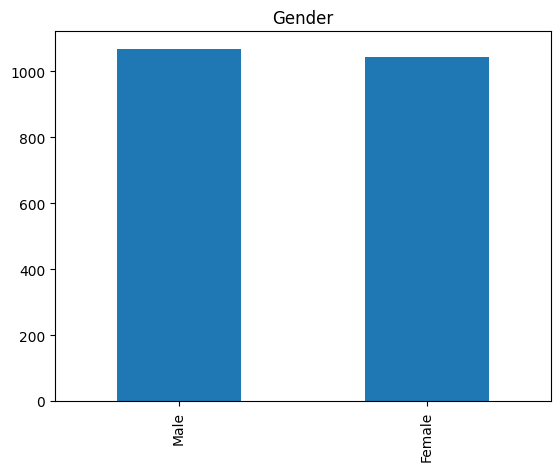

In [78]:
feature = 'Gender'
count = X[feature].value_counts()
percent = 100*X[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

*Berdasarkan hasil visualisasi diatas dapat dilihat bahwa data termasuk seimbang karena data laki-laki dan perempuan memiliki ukuran yang hampir sama atau seimbang. Hal ini menandakan ukuran dataset yang digunakan baik digunakan untuk proses pelatihan model. Data yang tidak seimbang dapat membuat Sebagian besar algoritma pembelajaran mesin tidak bekerja dengan baik*

*Visualisasi distribusi data berdasarkan fitur tingkatan obesitas*

                     jumlah sampel  persentase
Obesity_Type_I                 351        16.6
Obesity_Type_III               324        15.3
Obesity_Type_II                297        14.1
Overweight_Level_I             290        13.7
Overweight_Level_II            290        13.7
Normal_Weight                  287        13.6
Insufficient_Weight            272        12.9


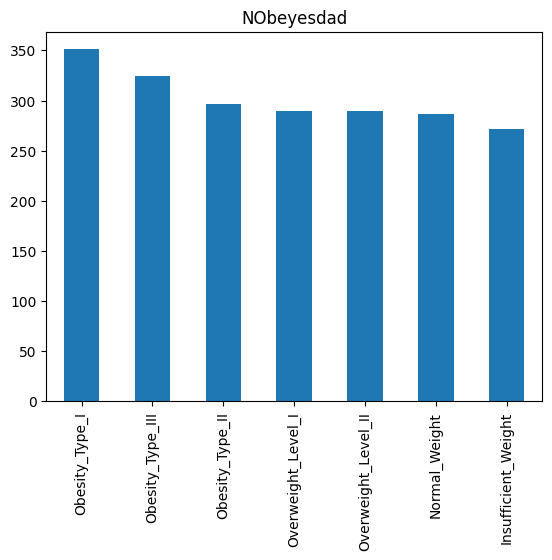

In [80]:
feature = 'NObeyesdad'
count = y[feature].value_counts()
percent = 100*y[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

*Berdasarkan hasil visualisasi diatas dapat dilihat bahwa data jenis-jenis tingkatan obesitas seimbang sehingga bisa digunakan untuk model*

*Visualisasi distribusi data berdasarkan fitur height, age*

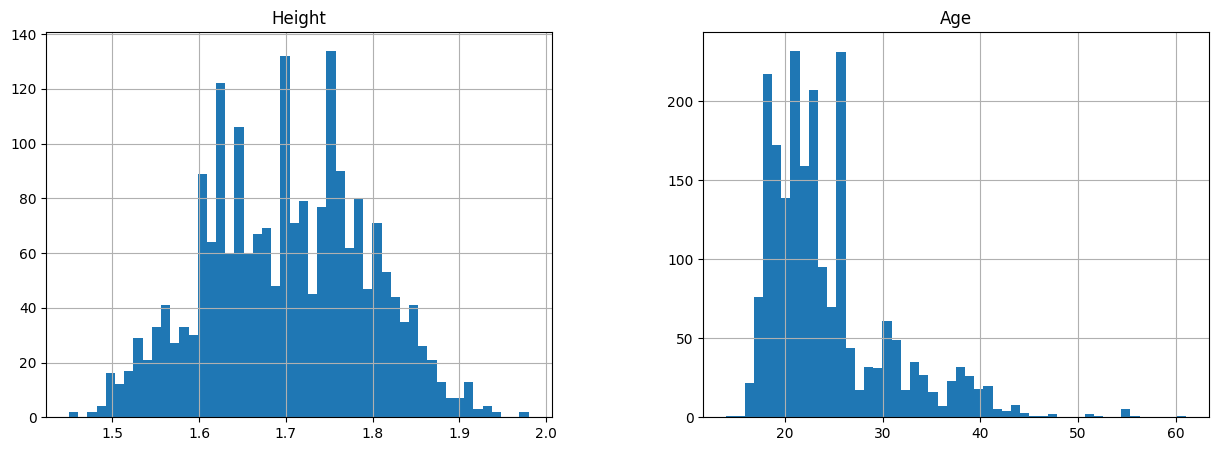

In [77]:
X.hist(bins=50, figsize=(15,5), column=['Height', 'Age'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

Visualisasi distribusi ukuran data diatas bertujuan untuk melihat distribusi data yang akan digunakan. Dalam Machine Learning, data yang memenuhi Distribusi Normal bermanfaat untuk pembuatan model. Hal ini membuat matematika lebih mudah ketika melakukan proses pembelajaran. Berdasarkan hasil diatas dapat diketahui bahwa fitur height memiliki distribusi normal sedangkan fitur age cenderung condong kekanan. Sebagian besar data *age* yang diambil adalah antara 19 hingga 25 tahun.

### Multivariate Analysis

*Visualisasi persebaran data dari fitur Weight, Height, dan Gender.*

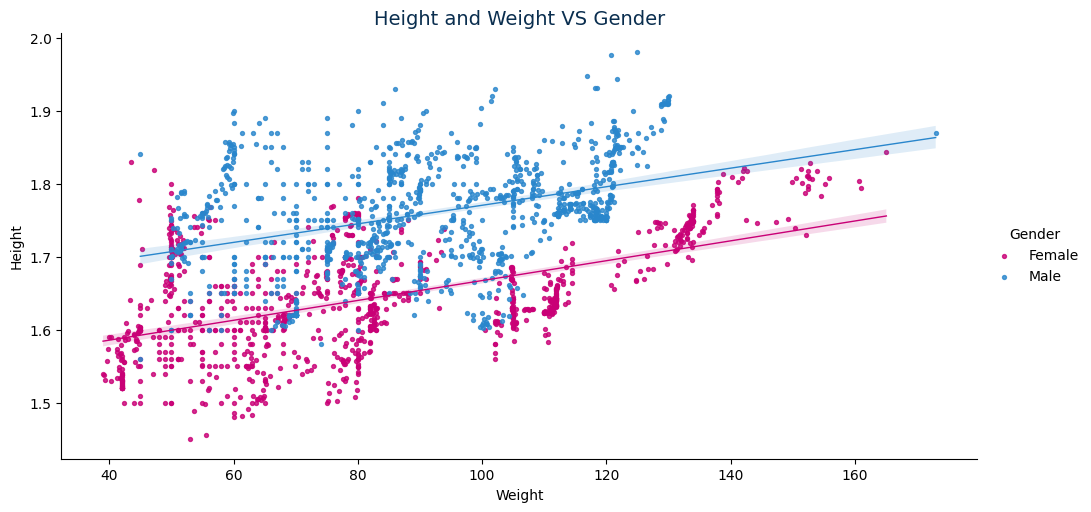

In [65]:
sns.lmplot(
    data=X,
    x="Weight",
    y="Height",
    height=5,
    aspect=2,
    hue="Gender",
    palette={"Female": "#c90076", "Male": "#2986cc"},
    scatter_kws={"s": 8},
    line_kws={"linewidth": 1},
)
plt.title("Height and Weight VS Gender", fontsize=14, color="#0a2e4f")
plt.show()

Berdasarkan visualisasi diatas dapat dilihat pada umumnya bahwa pria memiliki fitur *height* yang lebih tinggi dibandingkan wanita. Sedangkan wanita mendominasi untuk berat badan (*weight*) diatas 130.

## Data Preparation

*Mengimport librari scikit learn untuk mengguncakan package LabelEncoder*

In [11]:
from sklearn.preprocessing import LabelEncoder

*Mendapatkan kolom-kolom dengan tipedata selain integer yang selanjutnya akan di encode menjadi angka*

In [12]:
to_cat = X.loc[:, X.nunique() < 8].columns
to_cat

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')

*Mengkonfersi data-data objek yang bersifat kategorikal menjadi numeric yang dapat dengan mudah dipahami model*

In [13]:
encoder = LabelEncoder()

columns_to_encode = X.loc[:, X.nunique() < 8].columns

for column in columns_to_encode:
    X[column] = encoder.fit_transform(X[column])

<ipython-input-13-73e1145f1073>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
<ipython-input-13-73e1145f1073>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = encoder.fit_transform(X[column])
<ipython-input-13-73e1145f1073>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

*Melihat hasil dari label encoder, dapat dilihat bahwa semua fitur sudah berbentuk angka dan bisa dimasukkan kedalammodel*

In [14]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


Label encoder untuk target yang akan dirediksi

In [15]:
y['NObeyesdad'] = encoder.fit_transform(y['NObeyesdad'])
y.head()

<ipython-input-15-db0a745f59d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['NObeyesdad'] = encoder.fit_transform(y['NObeyesdad'])


,NObeyesdad
0,1
1,1
2,1
3,5
4,6


## Memisahkan data latih dan data uji

*Mengimport librari-librari yang dibutuhkan untuk proses pemisahan data latih dan data uji*

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

*Memisahkan data latih dan data uji dengan pembagian 80 % data latih dan 20 % data uji. Proses pemisahan ini dilakukan untuk menghindari terjadinya overfitting, yaitu suatu kondisi pelatihan yang hasil uji terhadap data yang dilatih sangat bagus tetapi diuji oleh data lain yang tidak digunakan dalam pelatihan sangat buruk. Overfitting terjadi karena kegagalan model dalam proses generalisasi data.*

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Karena label yang akan diprediksi berupa numerik, maka algoritma yang digunakan adalah algoritma regresi. Regresi adalah metode pada supervised learning yang mengembalikan target numerik untuk setiap sampel. Adapun algoritma sederhana sebagai tahapan awal yang digunakan adalah algoritma KNN, Random Forest dan Boosting

*Mengimport librari-librari yang digunakan untuk proses modelling*

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error



*Menggunakan algoritma grid search untuk hyperparameter tunning, berikut model-model dan hyperparameter pada model yang akan di tunning. Grid search adalah suatu cara untuk menemukan parameter terbaik yang digunakan untuk modeling dalam machin learning. Memakai grid search bertujuan untuk mencari hyperparameter terbaik yang hendak digunakan untuk modeling di suatu algoritma machine learning.*

In [19]:
algo_params = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
        }
    },
    'boosting': {
        'model': AdaBoostRegressor(),
        'params': {
            'learning_rate' : [0.1, 0.01, 0.001],
            'n_estimators': [25, 50, 100],
            'random_state': [11, 33, 55]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [25, 50, 100],
            'max_depth' : [8, 16, 32],
            'random_state': [11, 33, 55],
        }
    }

}

*Proses pelatihan model menggunakan algoritma grid search untuk menentukan hyperparameter yang terbaik*

In [20]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)
for algo_name, config in algo_params.items():
    gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X,y.values.ravel())
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params'])

*Mencetak hyperparameter terbaik untuk setiap model*

In [21]:
result

,model,best_score,best_params
0,knn,0.822650,{'n_neighbors': 5}
1,boosting,0.616645,"{'learning_rate': 0.1, 'n_estimators': 100, 'r..."
2,random_forest,0.964747,"{'max_depth': 32, 'n_estimators': 25, 'random_..."


*Menjalankan model-model menggunakan hyperparameter terbaik, melist nama-nama model dan nama perhitungan error yang digunakan dalam bentuk dataframe*

In [22]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])



*Inisialisasi dan menjalankan algoritma KNN dengan hyperparameter terbaik yang didapatkan sebelumnya*

In [23]:

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

*Inisialisasi dan menjalankan algoritma Random Forest dengan hyperparameter terbaik yang didapatkan sebelumnya*

In [24]:

RF = RandomForestRegressor(n_estimators=25, max_depth=32, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train.values.ravel())

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

*Inisialisasi dan menjalankan algoritma Boosting Forest dengan hyperparameter terbaik yang didapatkan sebelumnya*

In [25]:
boosting = AdaBoostRegressor(learning_rate=0.1, random_state=55, n_estimators= 100)
boosting.fit(X_train, y_train.values.ravel())
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##Evaluasi Model

 Metode Mean Squared Error (MSE) digunakan pada proyek ini untuk menentukan algoritma model machine learning yang terbaik. Secara umum MSE digunakan untuk mengecek estimasi berapa nilai kesalahan pada hasil prediksi. Nilai MSE yang rendah atau nilai MSE mendekati nol menunjukkan bahwa hasil prediksi sesuai dengan data aktual dan bisa dijadikan untuk perhitungan prediksi di periode mendatang. Metode MSE digunakan untuk mengevaluasi metode pengukuran dengan model regresi.

*Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma*

In [26]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])


*Buat dictionary untuk setiap algoritma yang digunakan*

In [27]:
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

*Hitung Mean Squared Error masing-masing algoritma pada data train dan test*

In [28]:
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

*Mencetak nilai-nilai mse yang didapatan pada setiap model*

In [29]:
mse

,train,test
KNN,0.00062,0.00108
RF,0.000057,0.000395
Boosting,0.001517,0.001655


*Visualisasi dengan box plot untuk mempermudah membandingkan masing-masing kesalahan pada model. Berdasarkan hasil visualisasi didapatkan bahwa algoritma Random Forest memliki kesalahan yang palingkecil dibandingkan lagoritma lainnya.*

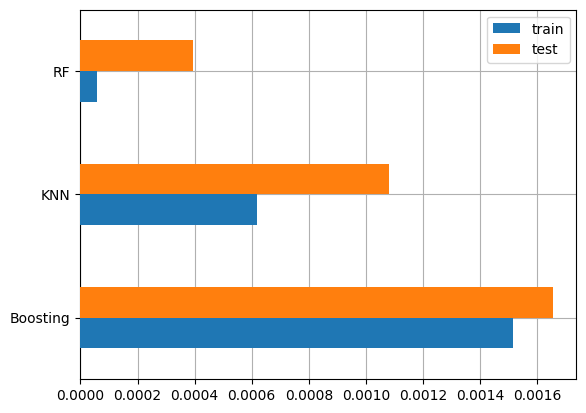

In [30]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

*Membuat prediksi menggunakan beberapa data test pada masing-masing model. Terlihat bahwa prediksi dengan Random Forest (RF) memberikan hasil yang paling mendekati dibandingkan dengan model-model lainnya*

In [31]:
prediksi = X_test.iloc[5:10].copy()
pred_dict = {'y_true':y_test[5:10].values.ravel()}


for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pred_dict['prediksi_KNN'] = pred_dict['prediksi_KNN'].flatten()
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
0,0,0.0,0.0,0.3
1,3,3.0,3.0,3.3
2,5,4.2,4.9,3.9
3,2,2.6,2.0,4.0
4,0,0.0,0.0,0.3


# Daftar Pustaka
Gozukara Bag, H. G., Yagin, F. H., Gormez, Y., González, P. P., Colak, C., Gülü, M., ... & Ardigò, L. P. (2023). Estimation of obesity levels through the proposed predictive approach based on physical activity and nutritional habits. Diagnostics, 13(18), 2949.

Navidad, L., Padial-Ruz, R., & González, M. C. (2021). Nutrition, Physical activity, and new technology programs on obesity prevention in primary education: a systematic review. International Journal of Environmental Research and Public Health, 18(19), 10187.

Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in brief, 25, 104344.
